# Tarea 1

**Autor:** Alejandro Zarate Macias  
**Curso:** Métodos Matemáticos para Análisis de Datos  
**Fecha:** 25 de Agosto 2025

---

## Introducción

En este notebook se abordan los problemas 8 y 10 de la Tarea 1, relacionados con el método de Newton y la función de Rosenbrock, respectivamente.
El objetivo principal es desarrollar códigos que permitan calcular, analizar y visualizar los gradientes de estas funciones de manera más clara y eficiente.

---

## Problema 8 - Método de Newton

### Enunciado

Dada una función $f : \mathbb{R}^n \to \mathbb{R}$ y un punto inicial $\mathbf{x}_0 \in \mathbb{R}^n$, el método de Newton se define como sigue:
$$\mathbf{x}_{k+1} = \mathbf{x}_k - [\nabla^2 f(\mathbf{x}_k)]^{-1} \nabla f(\mathbf{x}_k), \quad k = 0, 1, 2, \ldots, K,$$

donde $\nabla f(\mathbf{x}_k)$ y $\nabla^2 f(\mathbf{x}_k)$ son respectivamente el gradiente y la matriz Hessiana de $f$ en $\mathbf{x}_k$.

Escribir un script en Python que, dado un número natural $K$, calcule el valor de $\mathbf{x}_k$ para la función $f(\mathbf{x}) = x_1^2 + 3x_2^2$. Considerar $\mathbf{x}_0 = [1, 1]$. Hacer un gráfico con los resultados.

---

### Implementación

Para la función $f(\mathbf{x}) = x_1^2 + 3x_2^2$:

**Gradiente:**
$$\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} 2x_1 \\ 6x_2 \end{bmatrix}$$

**Matriz Hessiana:**
$$\mathbf{H} = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\ \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} \end{bmatrix} = \begin{bmatrix} 2 & 0 \\ 0 & 6 \end{bmatrix}$$

**Hessiana Inversa:**
$$\mathbf{H}^{-1} = \begin{bmatrix} \frac{1}{2} & 0 \\ 0 & \frac{1}{6} \end{bmatrix}$$

In [1]:
import numpy as np                   # Manejo de vectores y matrices
import matplotlib.pyplot as plt      # Visualización de datos

In [2]:
# Método de Newton
class MetodoNewton:
    def __init__(self, x0, K):
        self.x0 = x0    # Punto inicial
        self.K = K      # Número máximo de iteraciones

    def f(self, x):
        """
        Cálculo de la función f(x) = x₁² + 3x₂²

        Args:
            x (numpy.ndarray): Vector de entrada de dimensión R²

        Returns:
            float: Valor de la función evaluada en x
        """
        return x[0]**2 + 3*x[1]**2

    def gradiente_f(self, x):
        """
        Cálculo del gradiente de f(x) = x₁² + 3x₂²

        Args:
            x (numpy.ndarray): Vector de entrada de dimensión R²
            
        Returns:
            numpy.ndarray: Vector gradiente [2x₁, 6x₂]
        """
        return np.array([2*x[0], 6*x[1]])

    def hessiana_inversa_f(self):
        """
        Matriz Hessiana inversa de f(x) = x₁² + 3x₂²
        
        La matriz Hessiana es:
        H = [2  0]
            [0  6]
        
        Su inversa es:
        H⁻¹ = [1/2  0 ]
              [0   1/6]
        
        Returns:
            numpy.ndarray: Matriz Hessiana inversa de 2x2
        """
        return np.array([[1/2, 0], 
                        [0, 1/6]])
    
    def producto_punto(self, matrix, vector):
        """
        Realiza el producto punto entre una matriz y un vector.
        
        Args:
            matrix (numpy.ndarray): Matriz de dimensión nxn
            vector (numpy.ndarray): Vector de dimensión n
            
        Returns:
            numpy.ndarray: Vector resultado de dimensión n
        """
        result = np.zeros(matrix.shape[0])
        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                result[i] += matrix[i, j] * vector[j]
        return result

    def metodo_newton(self, x0, K):
        """
        Implementación del Método de Newton para optimización.
        
        El método de Newton utiliza la fórmula:
        x_{k+1} = x_k - H⁻¹(x_k) * ∇f(x_k)
        
        donde:
        > H⁻¹(x_k) es la inversa de la matriz Hessiana en x_k
        > ∇f(x_k) es el gradiente de la función en x_k
        
        Args:
            x0 (numpy.ndarray): Punto inicial de dimensión 2
            K (int): Número máximo de iteraciones
            
        Returns:
            numpy.ndarray: Matriz con la trayectoria de puntos visitados
        """
        x = x0.copy()
        trayectoria = [x.copy()]

        print(f"Iteración 0: x = [{x[0]:.6f}, {x[1]:.6f}], f(x) = {self.f(x):.6f}")

        for k in range(K):
            grad = self.gradiente_f(x)
            hess = self.hessiana_inversa_f()
            x = x - self.producto_punto(hess, grad)
            trayectoria.append(x.copy())

            print(f"Iteración {k+1}: x = [{x[0]:.6f}, {x[1]:.6f}], f(x) = {self.f(x):.6f}")

        return np.array(trayectoria)
    
    def graficar_trayectoria(self, trayectoria):
        """
        Visualiza la trayectoria del método de optimización sobre las curvas de nivel
        
        Esta función crea un gráfico que muestra:
        - Las curvas de nivel de la función objetivo f(x) = x₁² + 3x₂²
        - La trayectoria seguida por el algoritmo de optimización
        - Los puntos inicial y final marcados
        - Anotaciones para cada punto de la trayectoria
        
        Args:
            trayectoria (numpy.ndarray): Matriz de puntos visitados
        """
        fig, ax = plt.subplots(figsize=(8, 6))

        # Crear una malla para las curvas de nivel
        x1_range = np.linspace(-1.5, 1.5, 100)
        x2_range = np.linspace(-1.5, 1.5, 100)
        X1, X2 = np.meshgrid(x1_range, x2_range)
        Z = X1**2 + 3*X2**2

        # Dibujar curvas de nivel
        contour = ax.contour(X1, X2, Z, levels=20, alpha=0.6, colors='gray')
        ax.clabel(contour, inline=True, fontsize=8)

        # Dibujar la trayectoria
        ax.plot(trayectoria[:, 0], trayectoria[:, 1], 'ro-', linewidth=2, markersize=8, label='Trayectoria')
        ax.plot(trayectoria[0, 0], trayectoria[0, 1], 'go', markersize=12, label='Inicio')
        ax.plot(trayectoria[-1, 0], trayectoria[-1, 1], 'bs', markersize=12, label='Final')

        # Anotar cada punto de la trayectoria
        for i, point in enumerate(trayectoria):
            ax.annotate(f'x_{i}', (point[0], point[1]), xytext=(5, 5), 
                        textcoords='offset points', fontsize=10, fontweight='bold')
        
        # Configurar el gráfico
        ax.set_xlabel('x₁', fontsize=12)
        ax.set_ylabel('x₂', fontsize=12)
        ax.set_title('Trayectoria del Método de Newton', fontsize=14)
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.axis('equal')

        plt.show()

In [3]:
# Configuración y ejecución del Método de Newton
x0 = np.array([1.0, 1.0])   # Punto inicial
K = 1                       # Número de iteraciones
metodo_newton = MetodoNewton(x0, K) 

print("Método de Newton para f(x) = x₁² + 3x₂²")
print(f"Punto inicial: x0 = {x0}")
print(f"f(x0) = {metodo_newton.f(x0)}")
print("Iteraciones:")

# Ejecutar el método de Newton
trayectoria = metodo_newton.metodo_newton(x0, K)

Método de Newton para f(x) = x₁² + 3x₂²
Punto inicial: x0 = [1. 1.]
f(x0) = 4.0
Iteraciones:
Iteración 0: x = [1.000000, 1.000000], f(x) = 4.000000
Iteración 1: x = [0.000000, 0.000000], f(x) = 0.000000


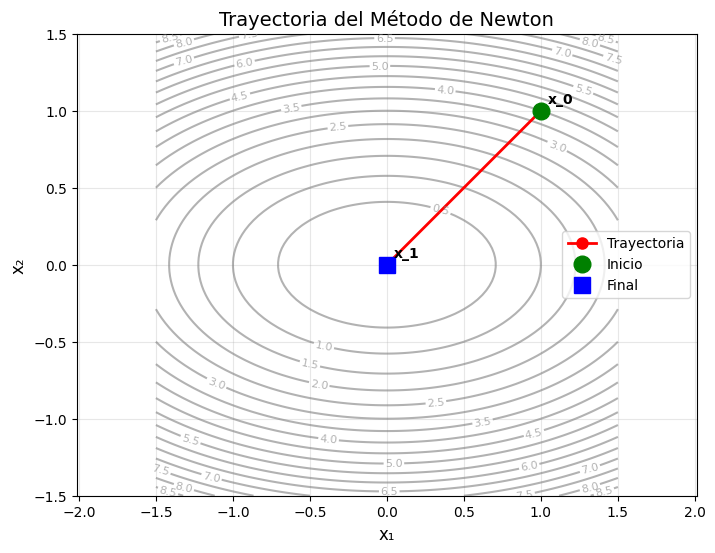

In [4]:
# Visualización de la trayectoria del Método de Newton
metodo_newton.graficar_trayectoria(trayectoria)

### Conclusión

El método de Newton demostró ser muy eficiente para la función cuadrática $f(x) = x_1^2 + 3x_2^2$, convergiendo al mínimo global $\mathbf{x} = [0, 0]$ en una sola iteración desde el punto inicial $\mathbf{x}_0 = [1, 1]$.

**Resultados obtenidos:**
- Punto inicial: $\mathbf{x}_0 = [1.0, 1.0]$ con $f(\mathbf{x}_0) = 4.0$
- Punto final: $\mathbf{x}_1 = [0.0, 0.0]$ con $f(\mathbf{x}_1) = 0.0$
- Convergencia en 1 iteración

Esta rápida convergencia se debe a que la forma de la función nos permite calcular las derivadas, gradientes y hessiano de manera sencilla al no tener términos cruzados o dependencias complejas, especificamente en el calculo del hessiano, el cual nos dio directamente números naturales sin la necesidad de tener que evaluarla en algun punto.

---

## Problema 10: Función de Rosenbrock

### Enunciado
Escribir un script en Python que, dado un número natural $n$ y un punto $\mathbf{x} \in \mathbb{R}^n$, aproxime $\nabla f(x)$ de la función de Rosenbrock usando diferencias finitas. Usar este programa para verificar los resultados obtenidos en el problema 9. Hacer una tabla o un gráfico mostrando el valor de la aproximación $||\nabla f(1)||$ para algunos valores decrecientes de $h$.

Función de Rosenbrock:

$$f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (x_i - 1)^2\right]$$

---

### Implementación

In [5]:
import numpy as np                  # Manejo de vectores y matrices
import matplotlib.pyplot as plt     # Visualización de datos
import pandas as pd                 # Manejo de datos tabulares

In [6]:
class Rosenbrock:
    def __init__(self):
        pass

    def rosenbrock(self,x):
        """
        Función de Rosenbrock generalizada para n dimensiones
        
        Args:
            x (numpy.ndarray): Vector de entrada de dimensión n
            
        Returns:
            float: Valor de la función de Rosenbrock evaluada en x
        """
        n = len(x)
        result = 0.0
        for i in range(n-1):
            result += 100*(x[i+1] - x[i]**2)**2 + (x[i] - 1)**2
        return result

    def gradiente_diferencias_finitas(self, x, h):
        """
        Aproximación del gradiente usando diferencias finitas hacia adelante
        
        Utiliza la fórmula de diferencias finitas:
        ∂f/∂x_i ≈ [f(x + h·e_i) - f(x)] / h
        
        donde e_i es el vector unitario en la dirección i-ésima.
        
        Args:
            x (numpy.ndarray): Punto donde evaluar el gradiente
            h (float): Tamaño del paso para las diferencias finitas
            
        Returns:
            numpy.ndarray: Vector gradiente aproximado de dimensión n
        """
        n = len(x)
        grad = np.zeros(n)
        x_h = x.copy()
        
        for i in range(n):
            x_h[i] += h  # Agregar paso h en la componente i
            grad[i] = (self.rosenbrock(x_h) - self.rosenbrock(x)) / h # Diferencias finitas
            x_h[i] = x[i]  # Restaurar el valor original para la siguiente iteración

        return grad

    def norma_vector(self, v):
        """
        Calcula la norma de un vector.
        
        ||v||₂ = sqrt(<v,v>)
        
        Args:
            v (numpy.ndarray): Vector de entrada de cualquier dimensión
            
        Returns:
            float: Norma del vector
        """
        norma = v.copy()
        for i in range(len(v)):
            norma[i] **= 2
        return np.sqrt(np.sum(norma))


In [7]:
#Cálculo del gradiente de la funcion Rosenbrock
x_r3 = np.array([1.0, 1.0, 1.0])  # Punto de prueba usando en el problema 9
rosenbrock = Rosenbrock()

dfg_gradiente = rosenbrock.gradiente_diferencias_finitas(x=x_r3, h=1e-5)
print(f"Gradiente aproximado en {x_r3}: {dfg_gradiente}")

Gradiente aproximado en [1. 1. 1.]: [0.00401004 0.00501004 0.001     ]


In [8]:
# Análisis del gradiente en distintos valores de h
h_values = np.array([1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15])
x_r2 = np.array([1.0, 1.0])  # Punto de prueba en R2

aproximaciones = []

# Calcular gradiente para diferentes valores de h y calcular su norma
for h in h_values:
    dfg_gradiente = rosenbrock.gradiente_diferencias_finitas(x=x_r2, h=h)
    norma = rosenbrock.norma_vector(dfg_gradiente)
    aproximaciones.append((h, dfg_gradiente, norma))

# Crear DataFrame para organizar los resultados
df = pd.DataFrame(aproximaciones, columns=['Valor de h', 'Gradiente Aproximado', 'Norma del Gradiente'])

In [9]:
# Mostrar tabla con los resultados del análisis de sensibilidad del paso h
df

,Valor de h,Gradiente Aproximado,Norma del Gradiente
0,1.000000e-02,"[4.050100000000003, 1.0000000000000018]",4.171727e+00
1,1.000000e-03,"[0.40140009999987863, 0.09999999999997797]",4.136690e-01
2,1.000000e-04,"[0.040104000099966855, 0.009999999999997797]",4.133196e-02
3,1.000000e-05,"[0.0040100400001558505, 0.0010000000000131024]",4.132847e-03
4,1.000000e-06,"[0.0004010003999696824, 9.999999998354668e-05]",4.132812e-04
5,1.000000e-07,"[4.0100004043629146e-05, 1.0000000011677344e-05]",4.132808e-05
6,1.000000e-08,"[4.009999951258683e-06, 9.99999987845058e-07]",4.132808e-06
7,1.000000e-09,"[4.0100006635778024e-07, 1.0000001654807488e-07]",4.132808e-07
8,1.000000e-10,"[4.010000663577803e-08, 1.0000001654807488e-08]",4.132808e-08
9,1.000000e-11,"[4.010000663577803e-09, 1.000000165480749e-09]",4.132808e-09


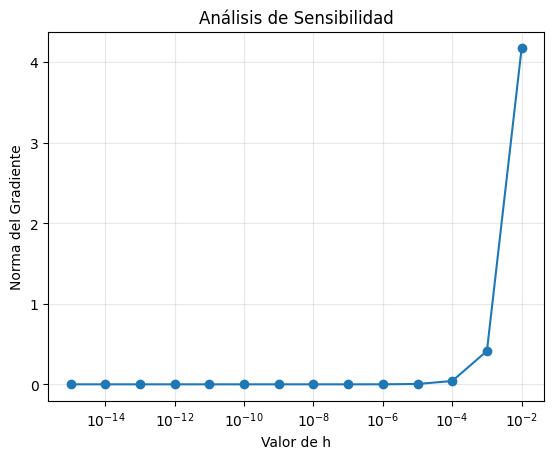

In [10]:
# Visualización del análisis de sensibilidad del paso de h en una gráfica de 2D

plt.semilogx(df['Valor de h'], df['Norma del Gradiente'], marker='o')
plt.title('Análisis de Sensibilidad')
plt.xlabel('Valor de h')
plt.ylabel('Norma del Gradiente')
plt.grid(True, alpha=0.3)

# Mostrar la gráfica
plt.show()

### Conclusión

La aproximación del gradiente de la función de Rosenbrock mediante diferencias finitas mostró resultados consistentes y precisos al utilizar valores cada vez más pequeños del paso $h$.

**Resultados obtenidos:**

- En el punto $\mathbf{x} = [1, 1]$, el gradiente aproximado converge a $[0, 0]$.
- Valores óptimos $h$ se encuentran a partir de $1e^{-5}$ proporcionan aproximaciones más estables.
- Valores muy grandes ($1e^{-2}$) dan resultados imprecisos.

Esto demuestra la importancia de seleccionar un valor de $h$ adecuado para alcanzar la precisión deseada en la aproximación del gradiente.
